In [1]:
from Objects.Transformations import *
from Objects.WSBM import *
from Objects.TWSBMInstance import *

from Computation.Computation import *
from Computation.ExtraMetrics import *

from Plotting.Plotting import *

In [2]:
N = 100
n = 1000
K = 2

In [3]:
RHOS_PIS_MODELS = list(product(RHOS[:1], PIS[:1], MODELS[:1]))

In [ ]:
for rho, pi, model in RHOS_PIS_MODELS:
	print(f"Simulating for rho={rho}, pi={pi}, model={model.__name__}")
	simulate_in_grid(N, model, (rho, pi), transformations=TRANSFORMS)

Simulating for rho=0.25, pi=0.1, model=betaWSBM
Progress: 50/10000 (0.5%). Elapsed: 00:01:32. ETA: 05:07:02.
Progress: 100/10000 (1.0%). Elapsed: 00:03:01. ETA: 04:59:13.
Progress: 150/10000 (1.5%). Elapsed: 00:05:18. ETA: 05:48:35.
Progress: 200/10000 (2.0%). Elapsed: 00:06:46. ETA: 05:32:16.
Progress: 250/10000 (2.5%). Elapsed: 00:08:36. ETA: 05:35:26.
Progress: 300/10000 (3.0%). Elapsed: 00:10:18. ETA: 05:33:30.
Progress: 350/10000 (3.5%). Elapsed: 00:11:43. ETA: 05:23:10.
Progress: 400/10000 (4.0%). Elapsed: 00:13:07. ETA: 05:14:53.
Progress: 450/10000 (4.5%). Elapsed: 00:14:32. ETA: 05:08:43.
Progress: 500/10000 (5.0%). Elapsed: 00:16:01. ETA: 05:04:23.
Progress: 550/10000 (5.5%). Elapsed: 00:17:25. ETA: 04:59:26.
Progress: 600/10000 (6.0%). Elapsed: 00:18:49. ETA: 04:54:48.
Progress: 650/10000 (6.5%). Elapsed: 00:20:13. ETA: 04:50:56.
Progress: 700/10000 (7.0%). Elapsed: 00:21:37. ETA: 04:47:15.
Progress: 750/10000 (7.5%). Elapsed: 00:22:58. ETA: 04:43:23.
Progress: 800/10000 (8.

In [4]:
small_map = {'Rand' : 'rand', 'C_true' : 'ctrue', 'C_graph' : 'cgraph', 'C_embed' : 'cembed'}

path = "Computation/Grids"
metrics = {}
for rho, pi, model in RHOS_PIS_MODELS:
	grids = np.load(f"{path}/{model.__name__}_{r_dot(rho)}_{r_dot(pi)}.npz")
	metrics[(rho, pi, model)] = {}
	for tid, t in TRANSFORMS_MAP.items():
		metrics[t] = {}
		metrics[(rho, pi, model)][t] = {}
		for metric in METRICS_ID:
			metrics[(rho, pi, model)][t][metric] = grids[f'{tid}_{small_map[metric]}']

In [5]:
for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	metrics[(rho, pi, model)] = best_transform_metrics(m)
	for t in TRANSFORMS:
		m = metrics[(rho, pi, model)][t]
		metrics[(rho, pi, model)][t] = correlation(m)
		metrics[(rho, pi, model)][t] = bias(m)

for m_id in METRICS_ID:
	m = []
	for (rho, pi, model), t in product(RHOS_PIS_MODELS, TRANSFORMS):
		m.append(metrics[(rho, pi, model)][t][m_id].ravel())
	metrics[m_id] = np.concatenate(m)

	for t in TRANSFORMS:
		m = []
		for rho, pi, model in RHOS_PIS_MODELS:
			m.append(metrics[(rho, pi, model)][t][m_id].ravel())
		metrics[t][m_id] = np.concatenate(m)

	for rho, pi, model in RHOS_PIS_MODELS:
		m = []
		for t in TRANSFORMS:
			m.append(metrics[(rho, pi, model)][t][m_id].ravel())
		metrics[(rho, pi, model)][m_id] = np.concatenate(m)

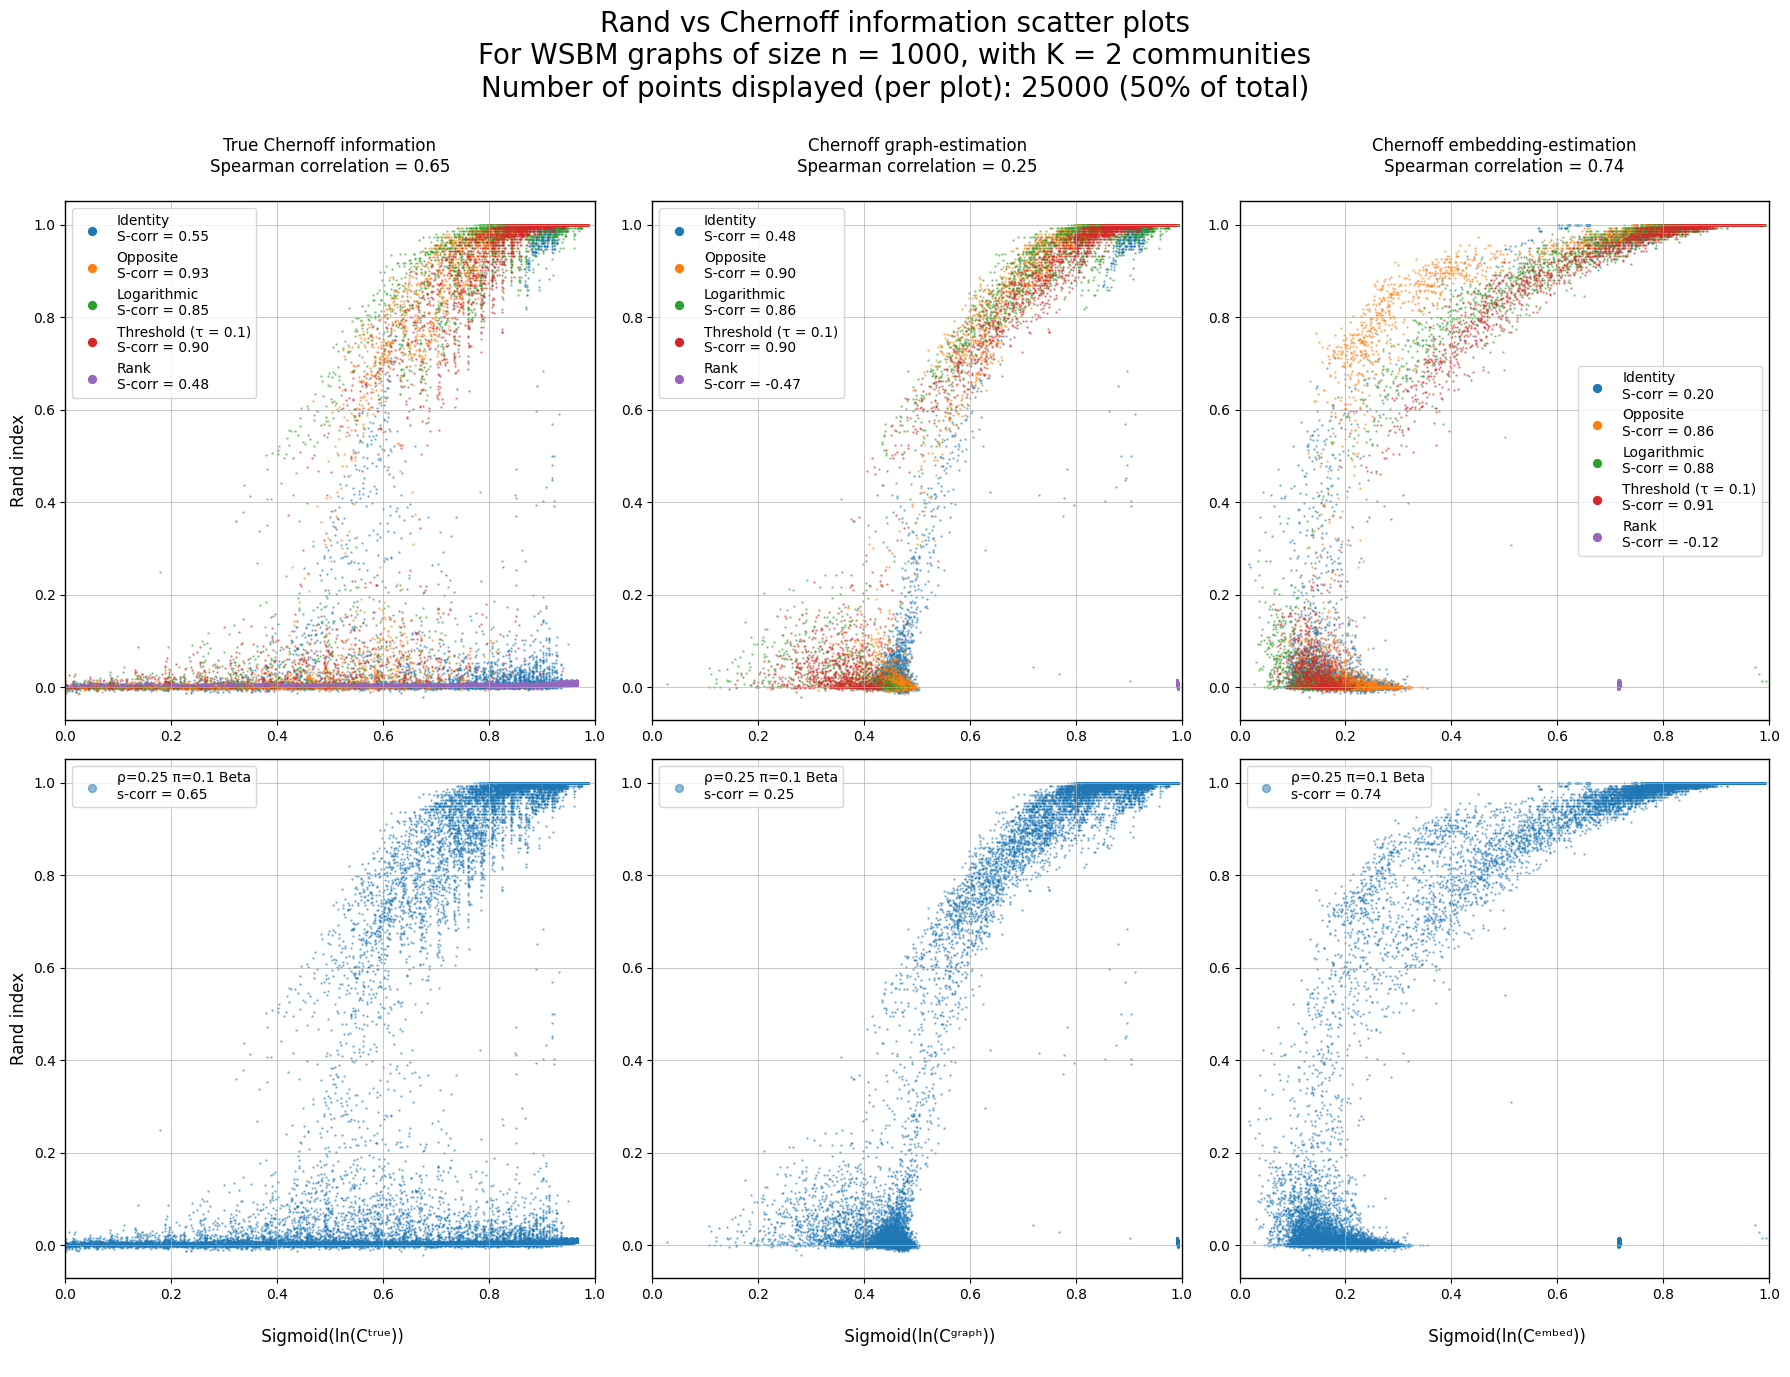

In [6]:
plot_scatter_Rand_vs_Chernoff(metrics, n_points_ratio_displayed=0.5)

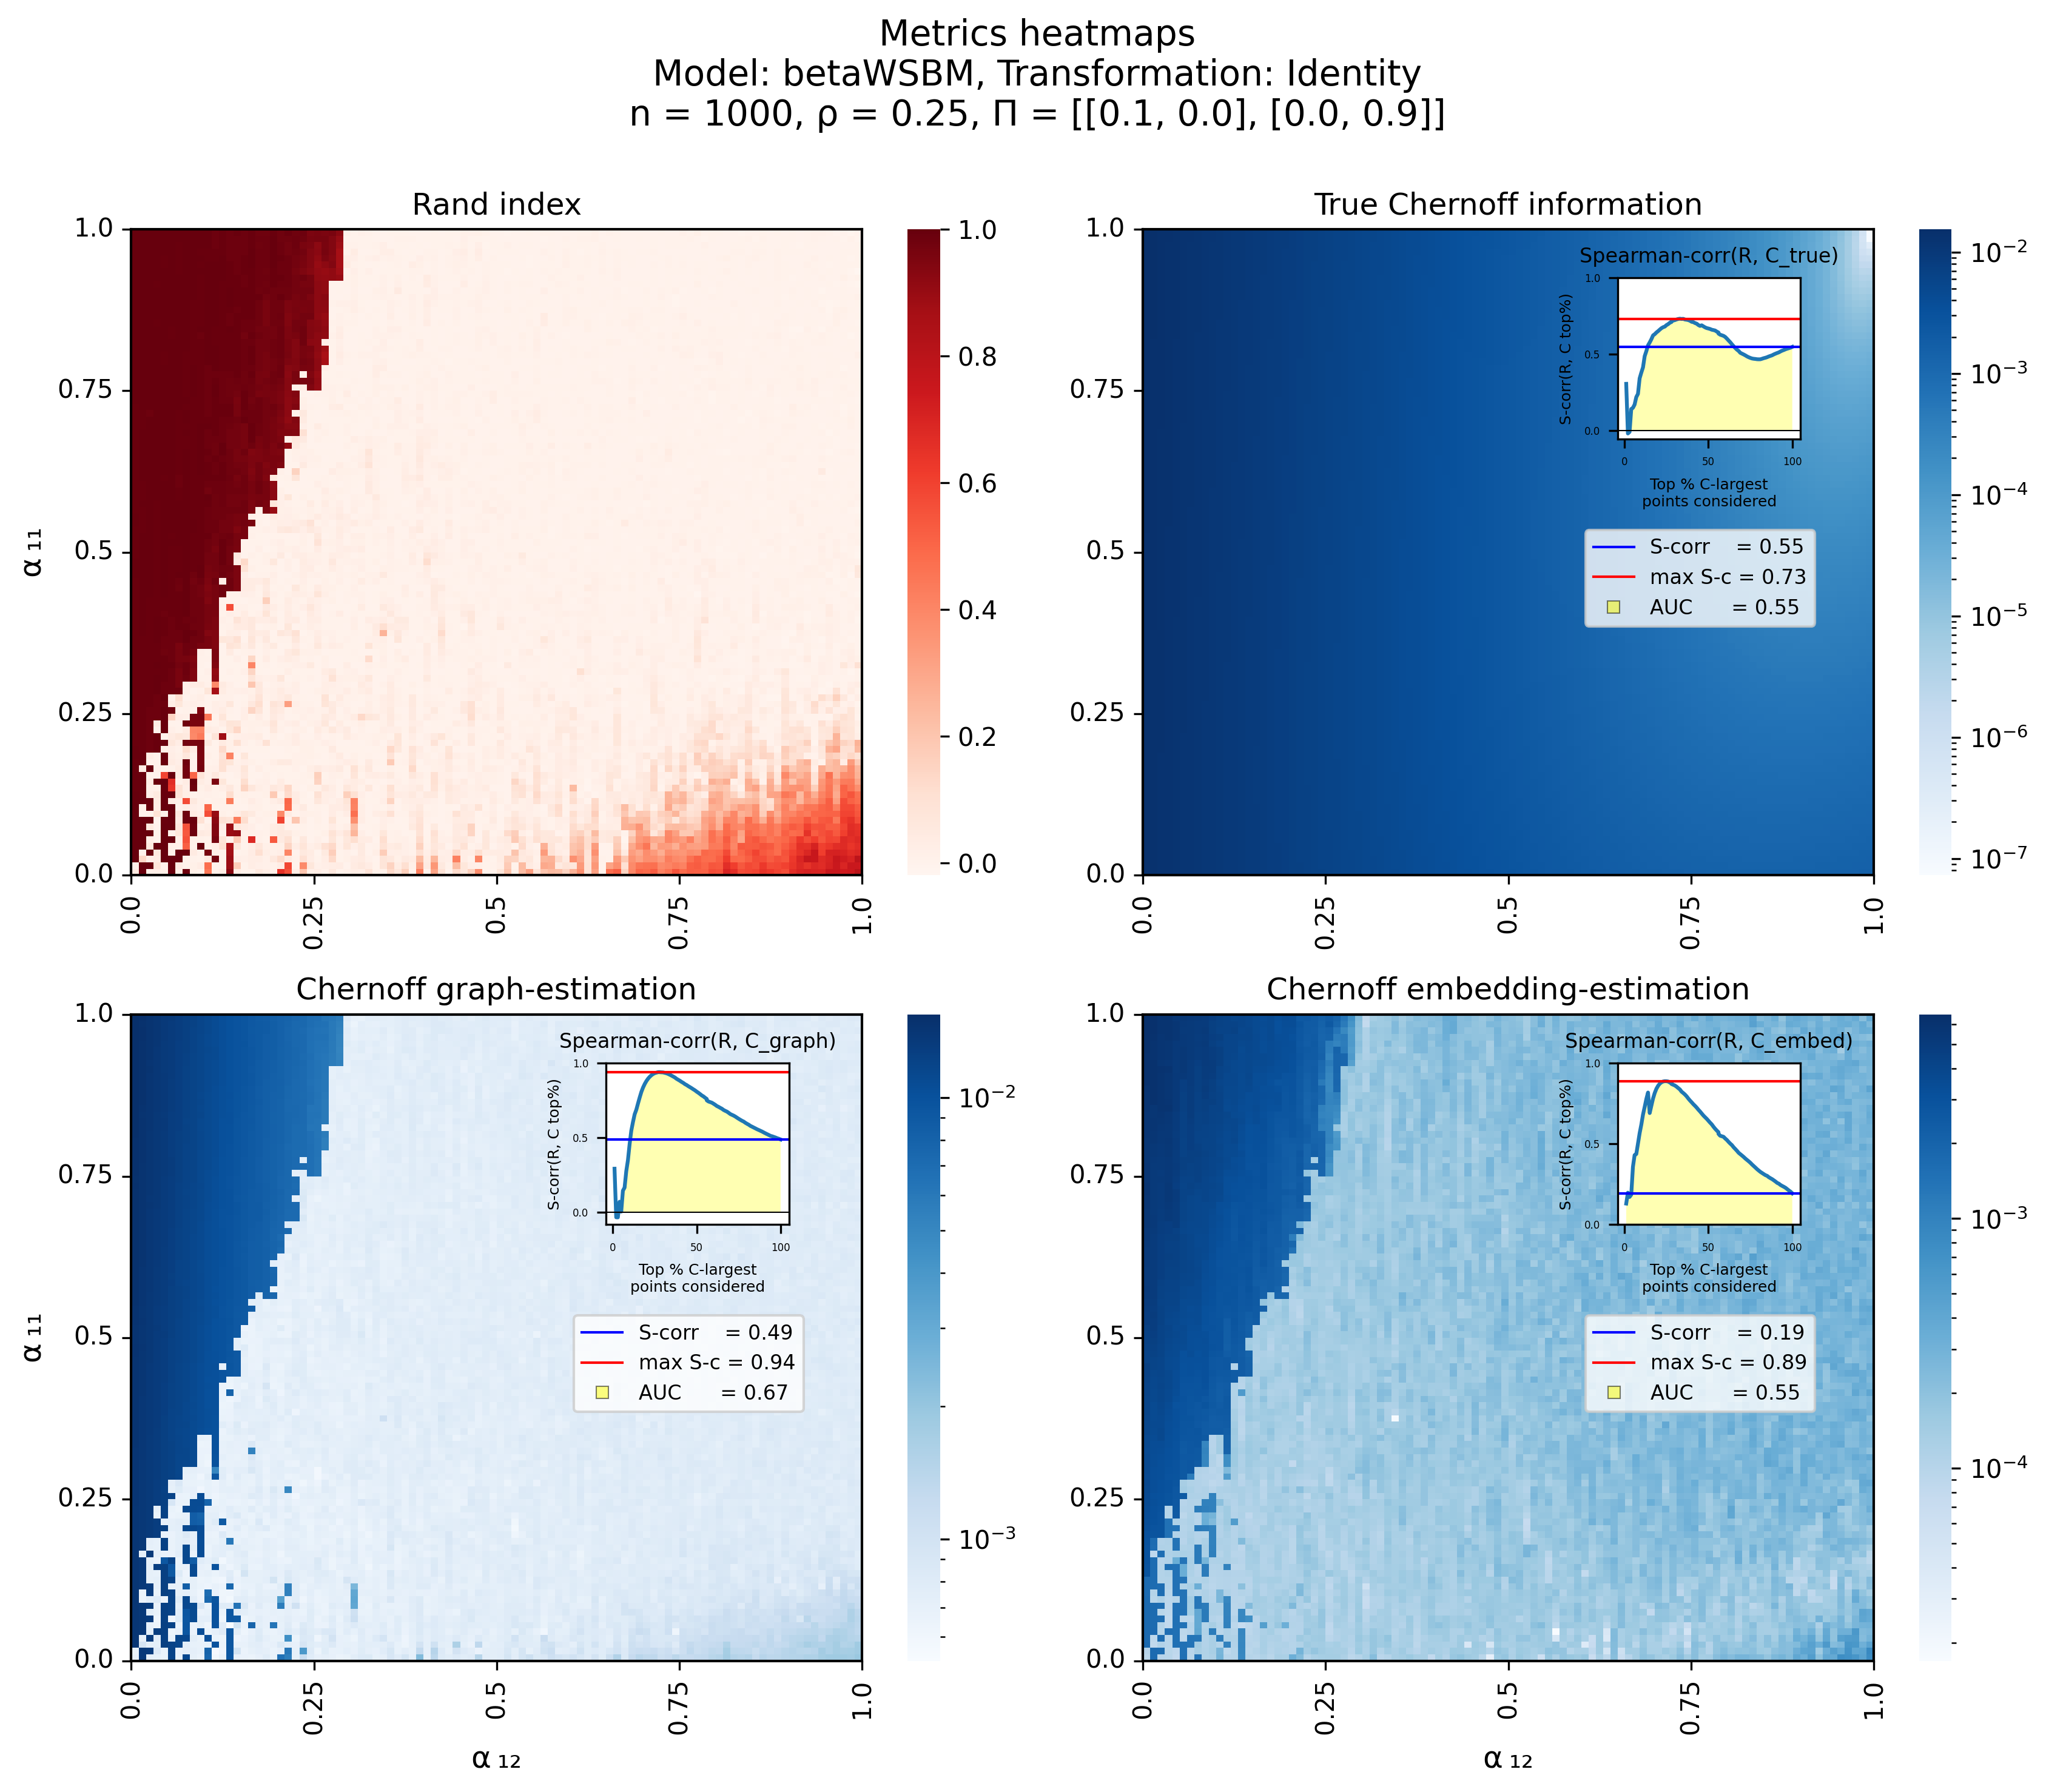

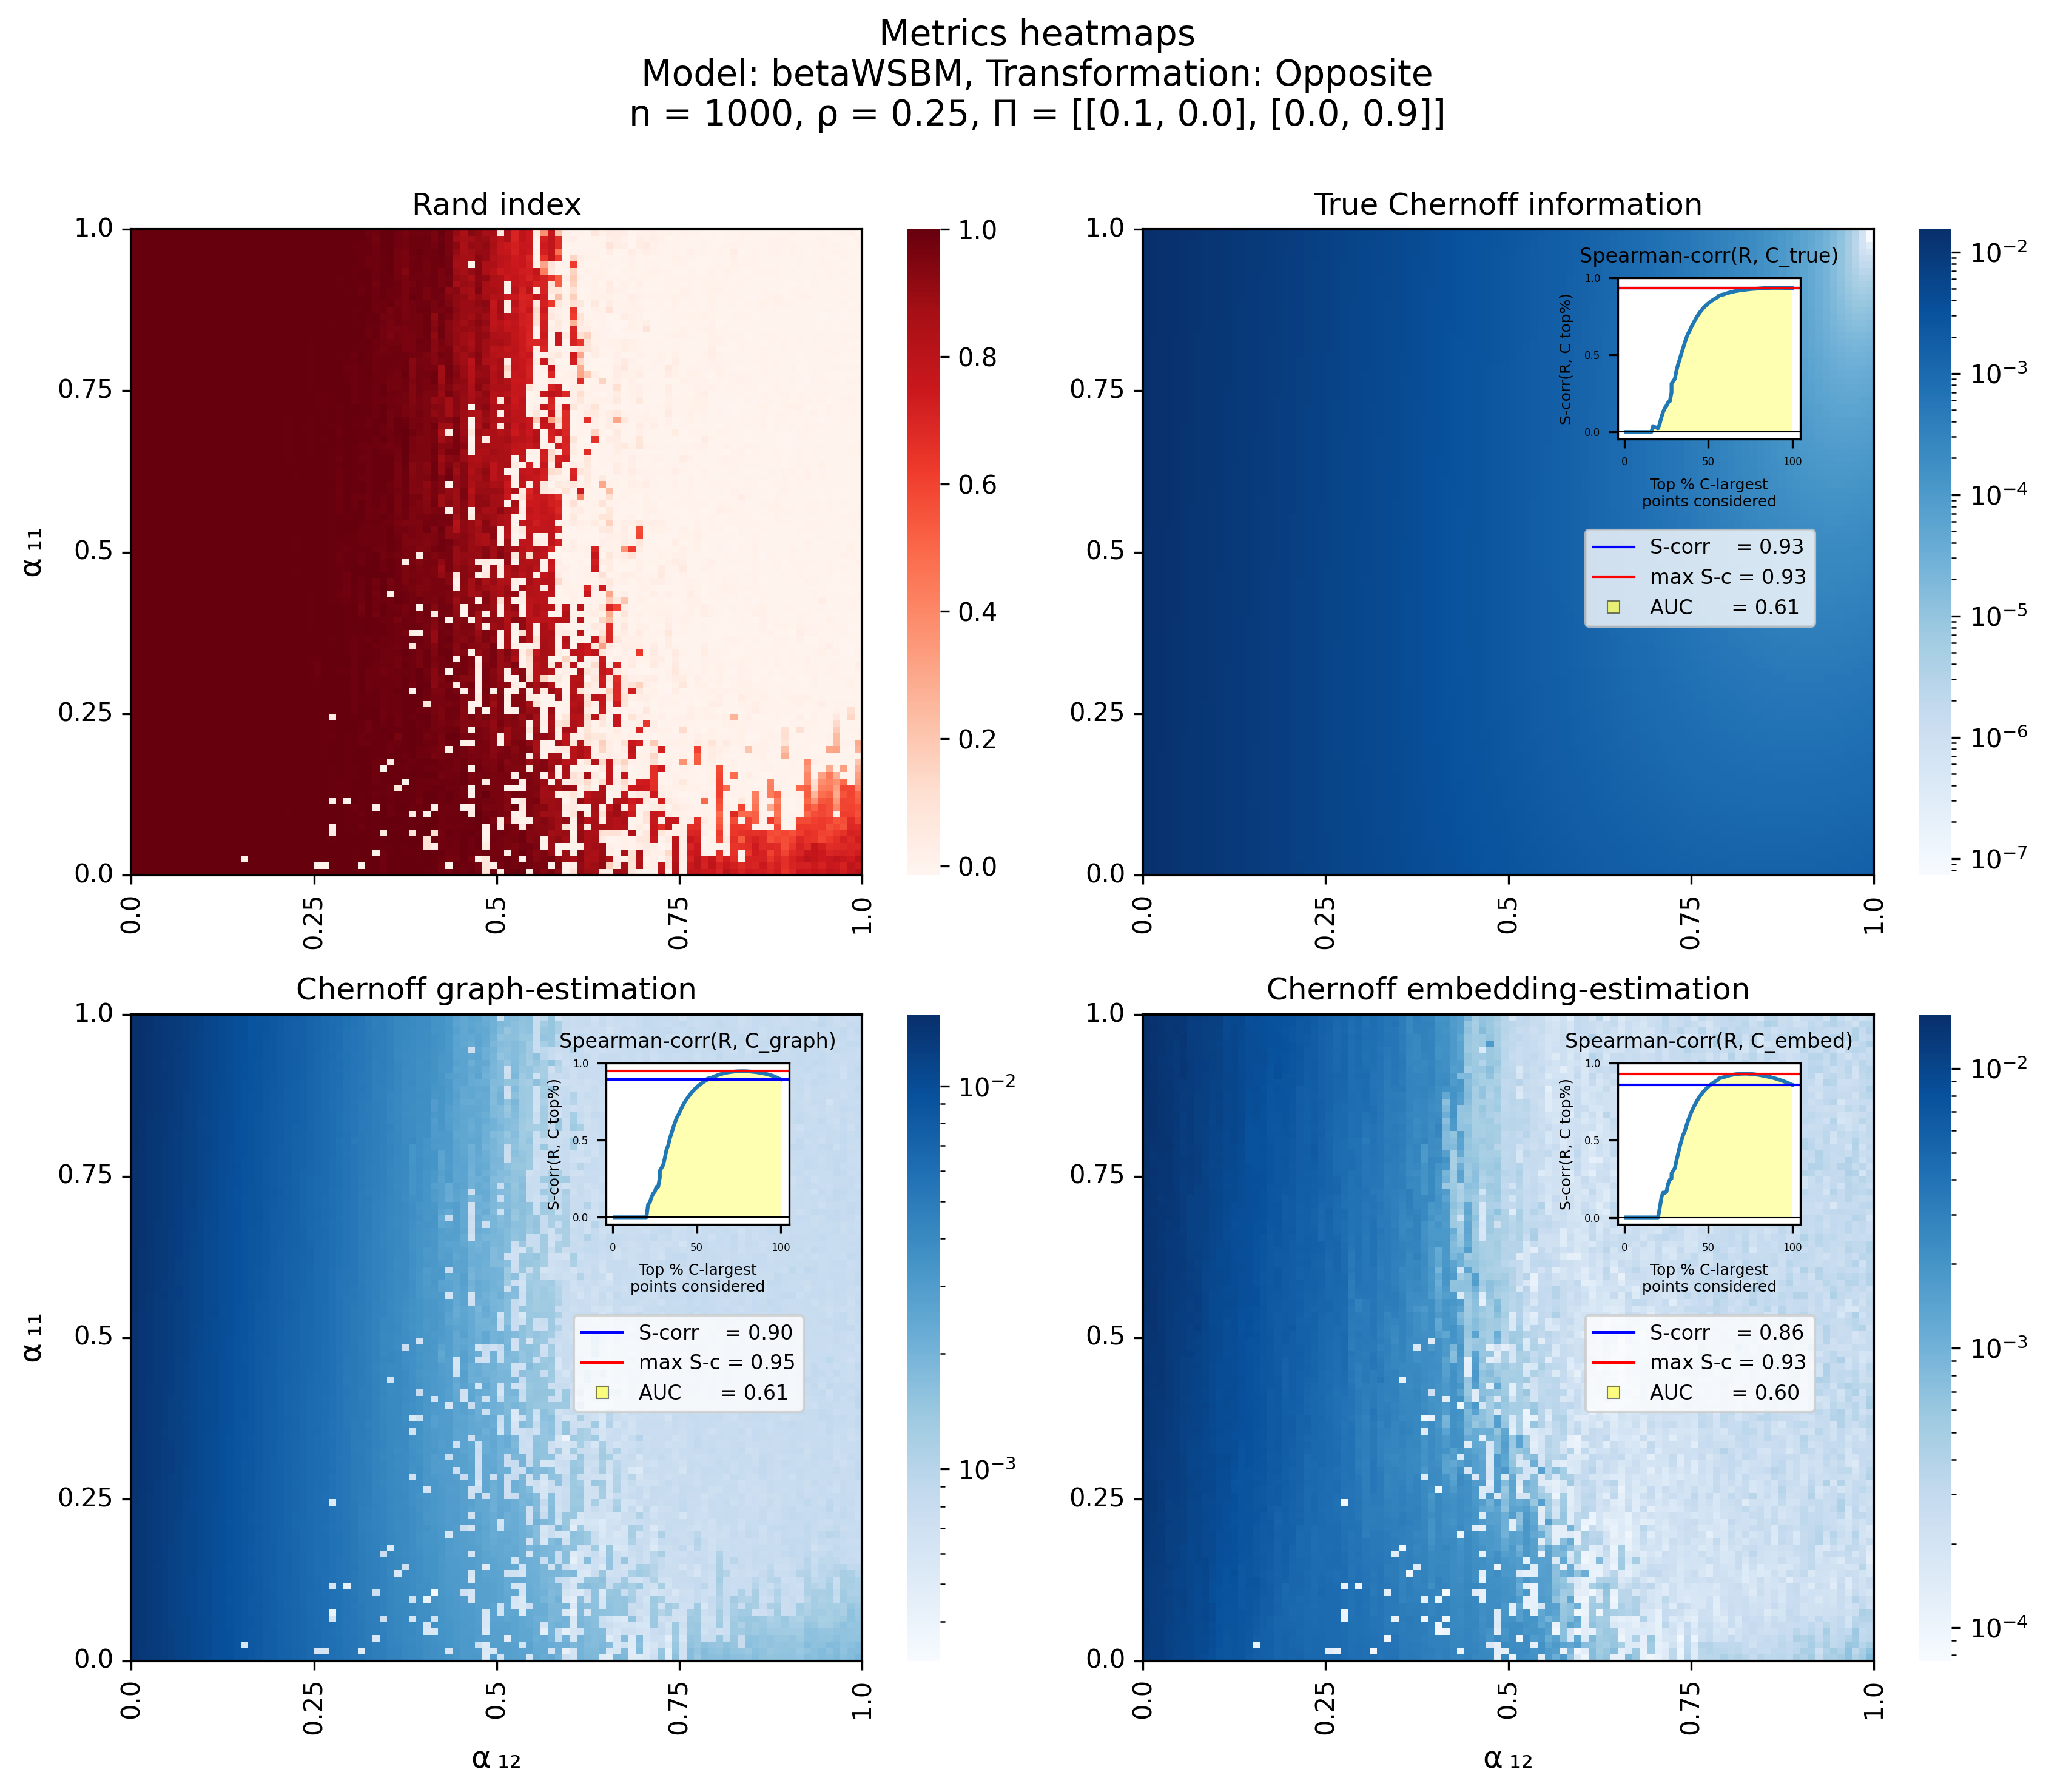

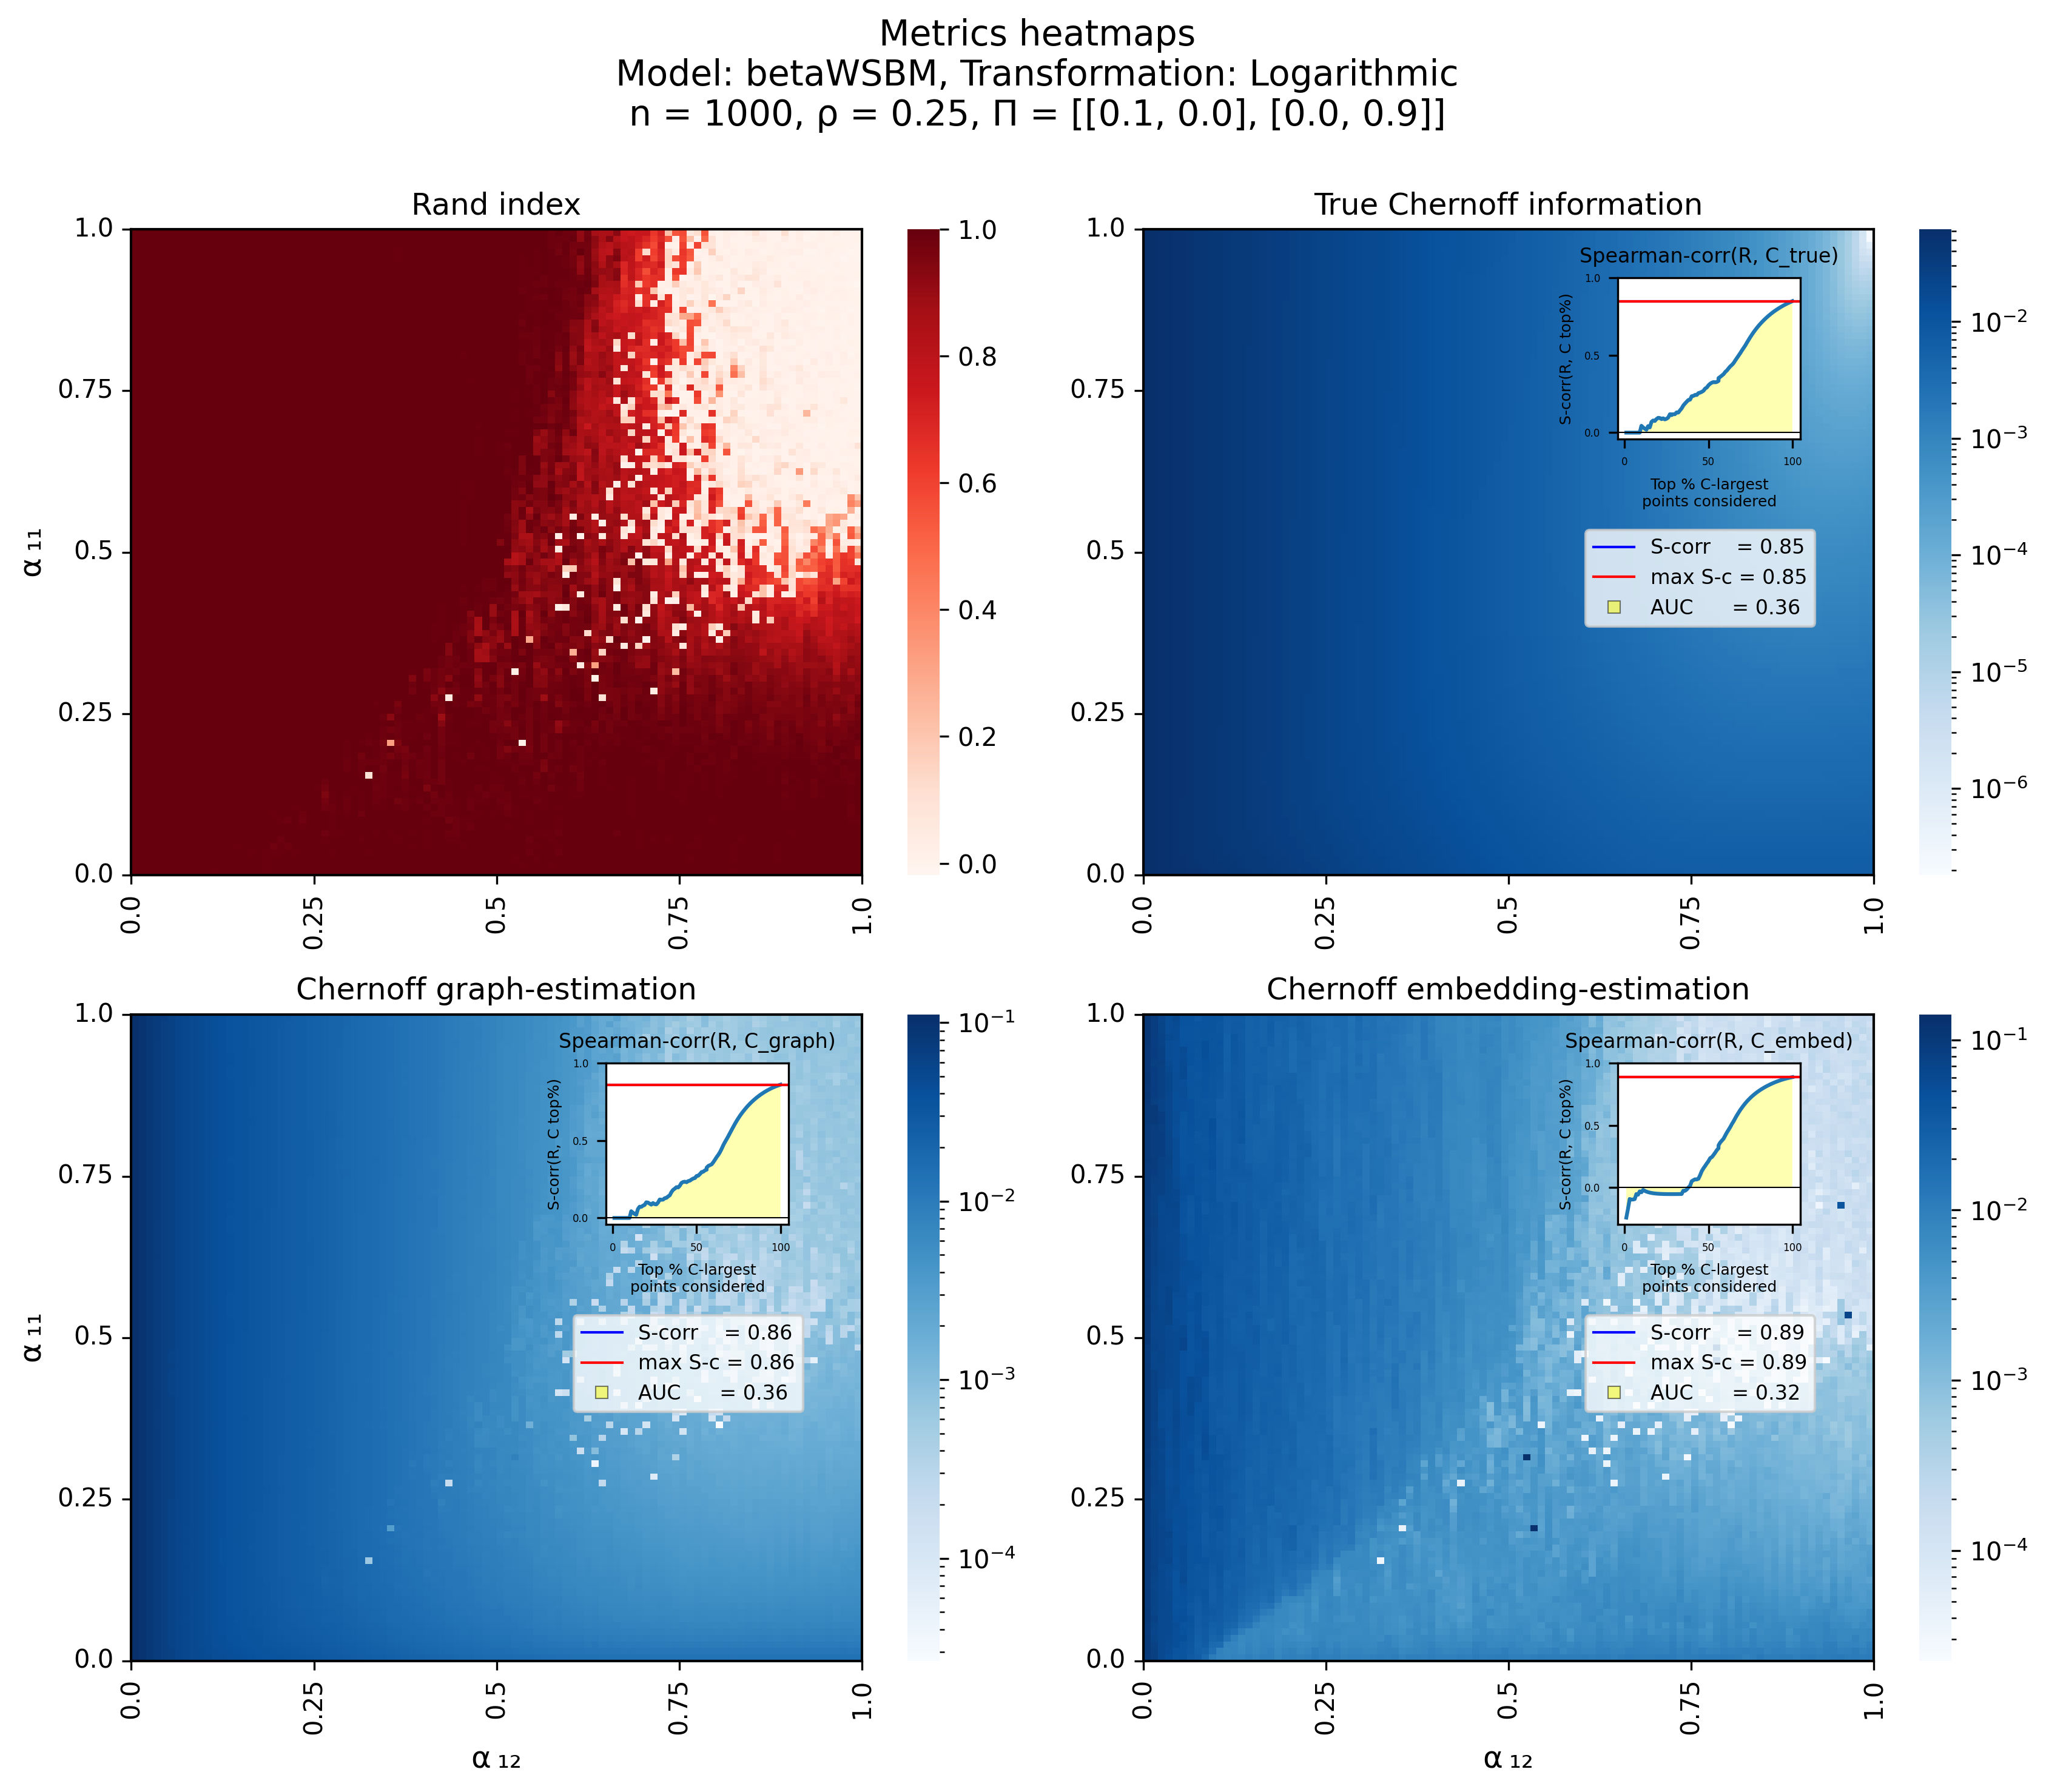

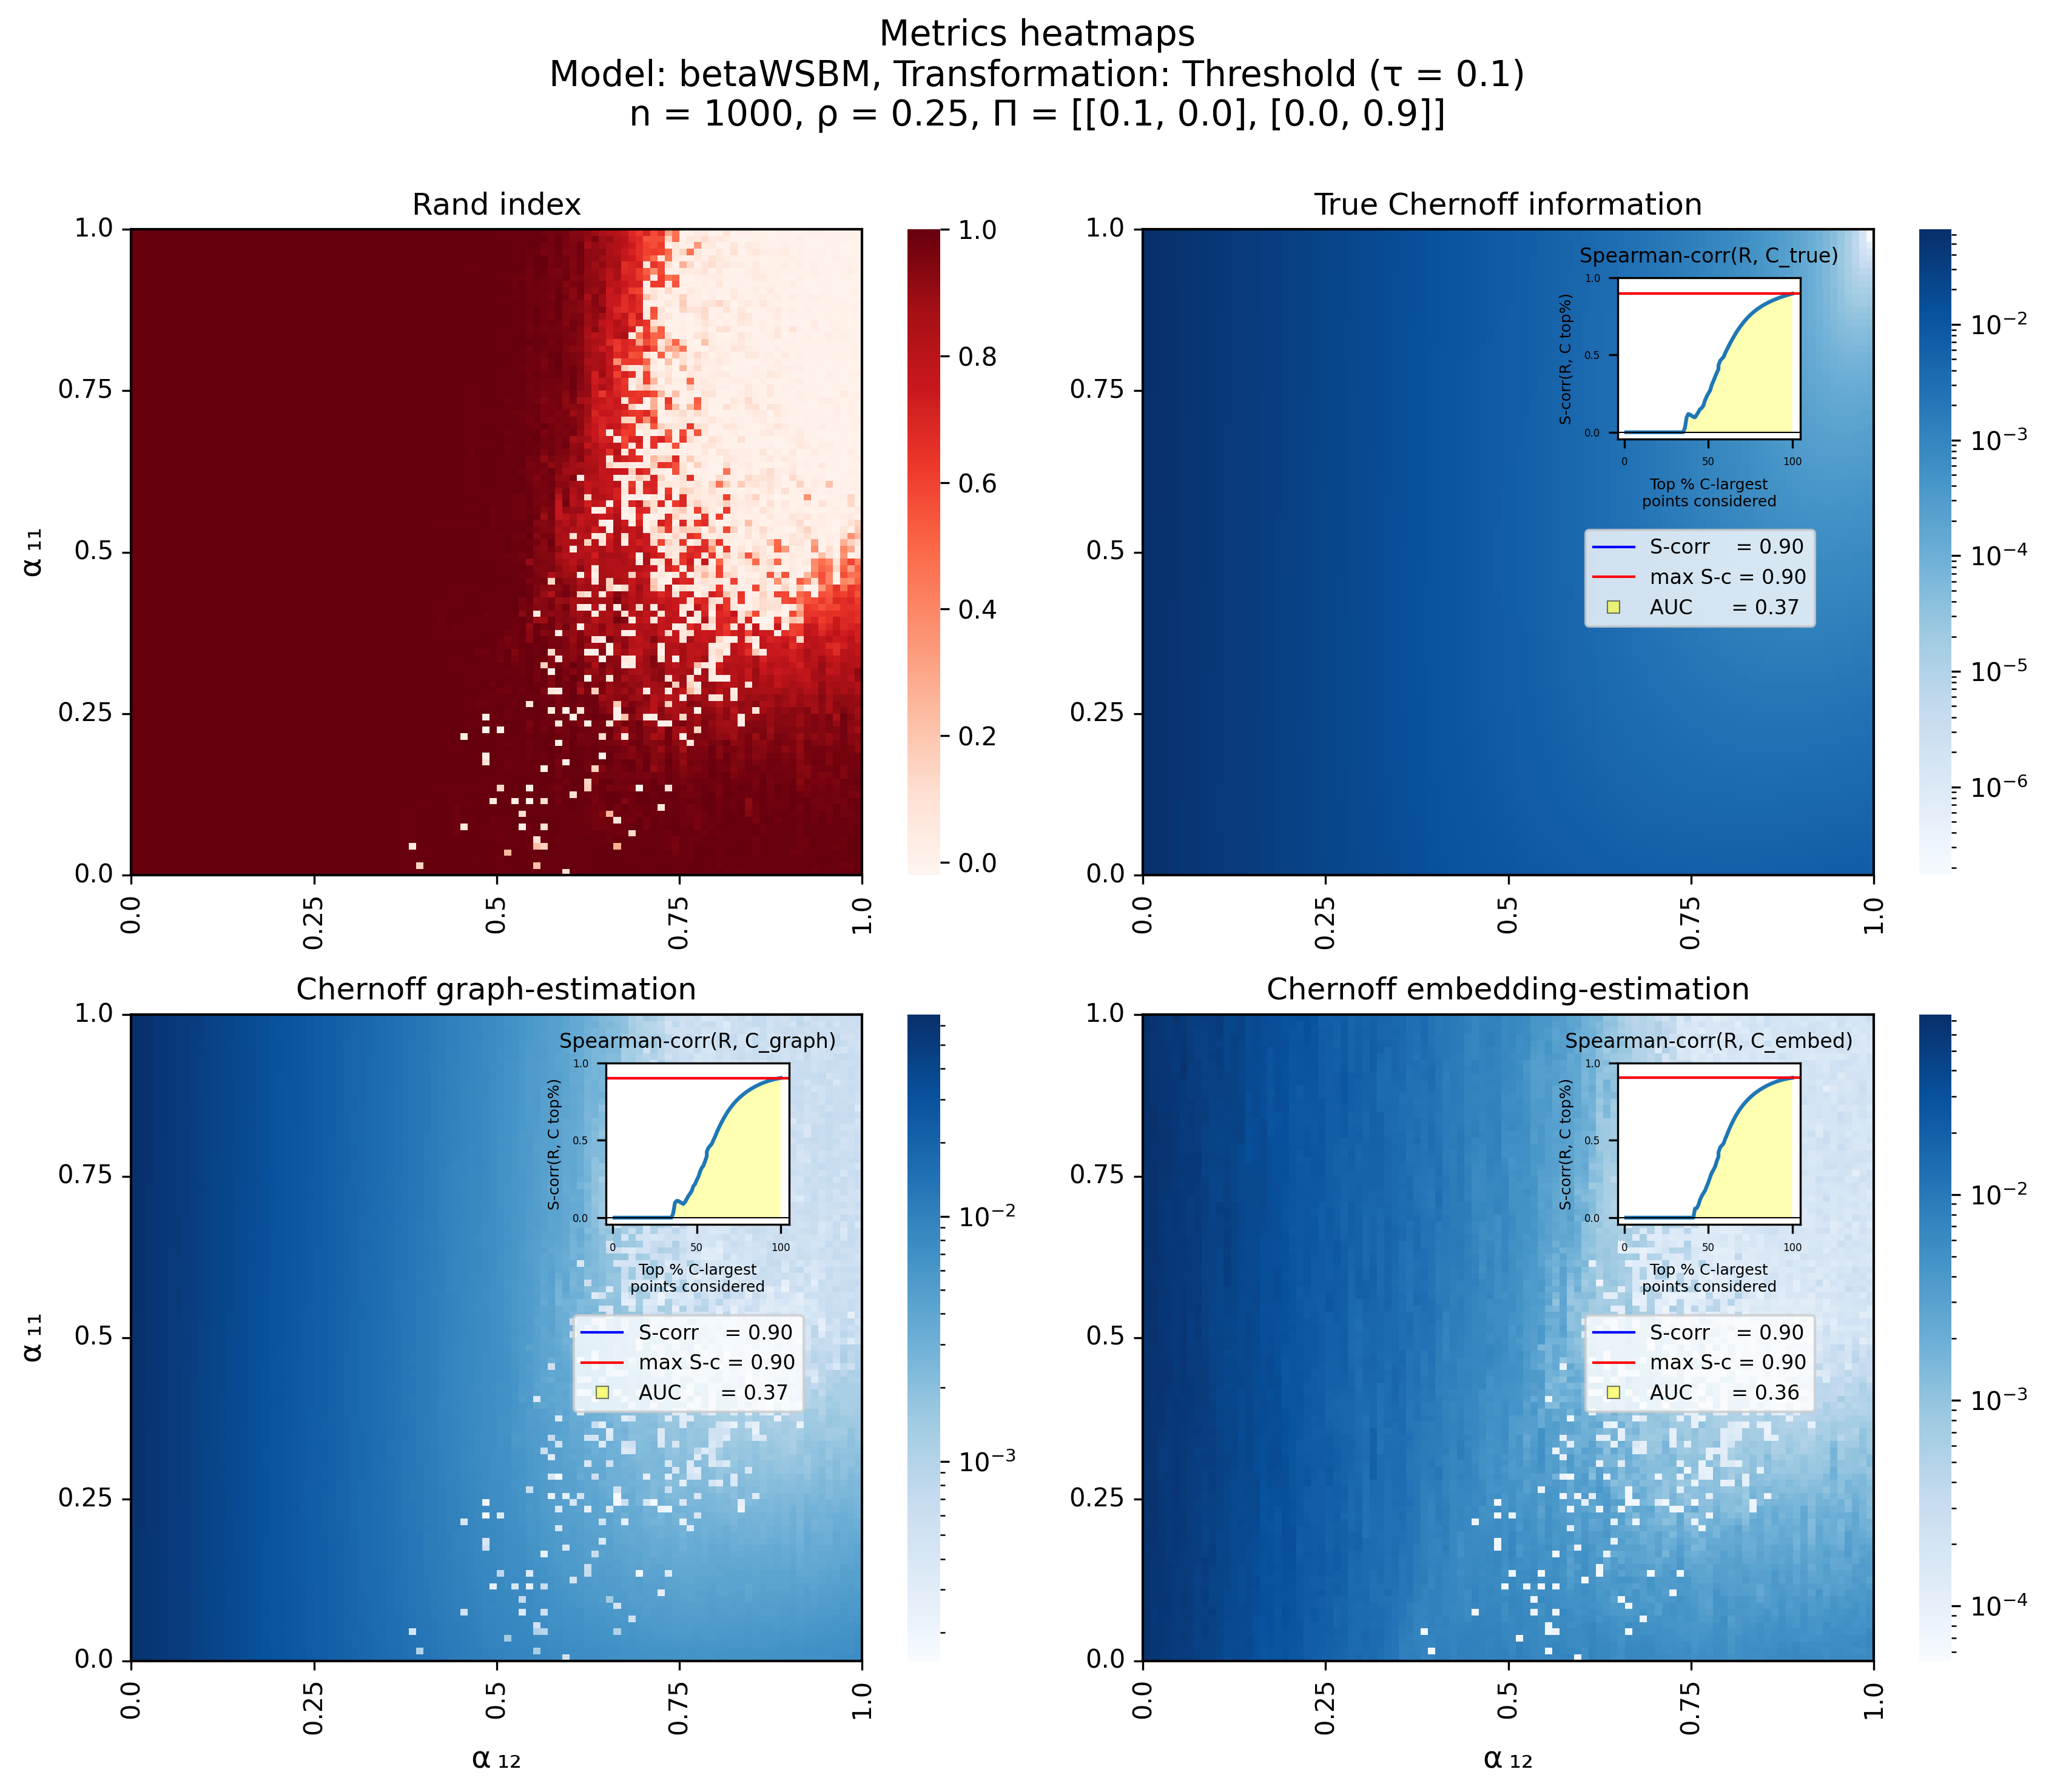

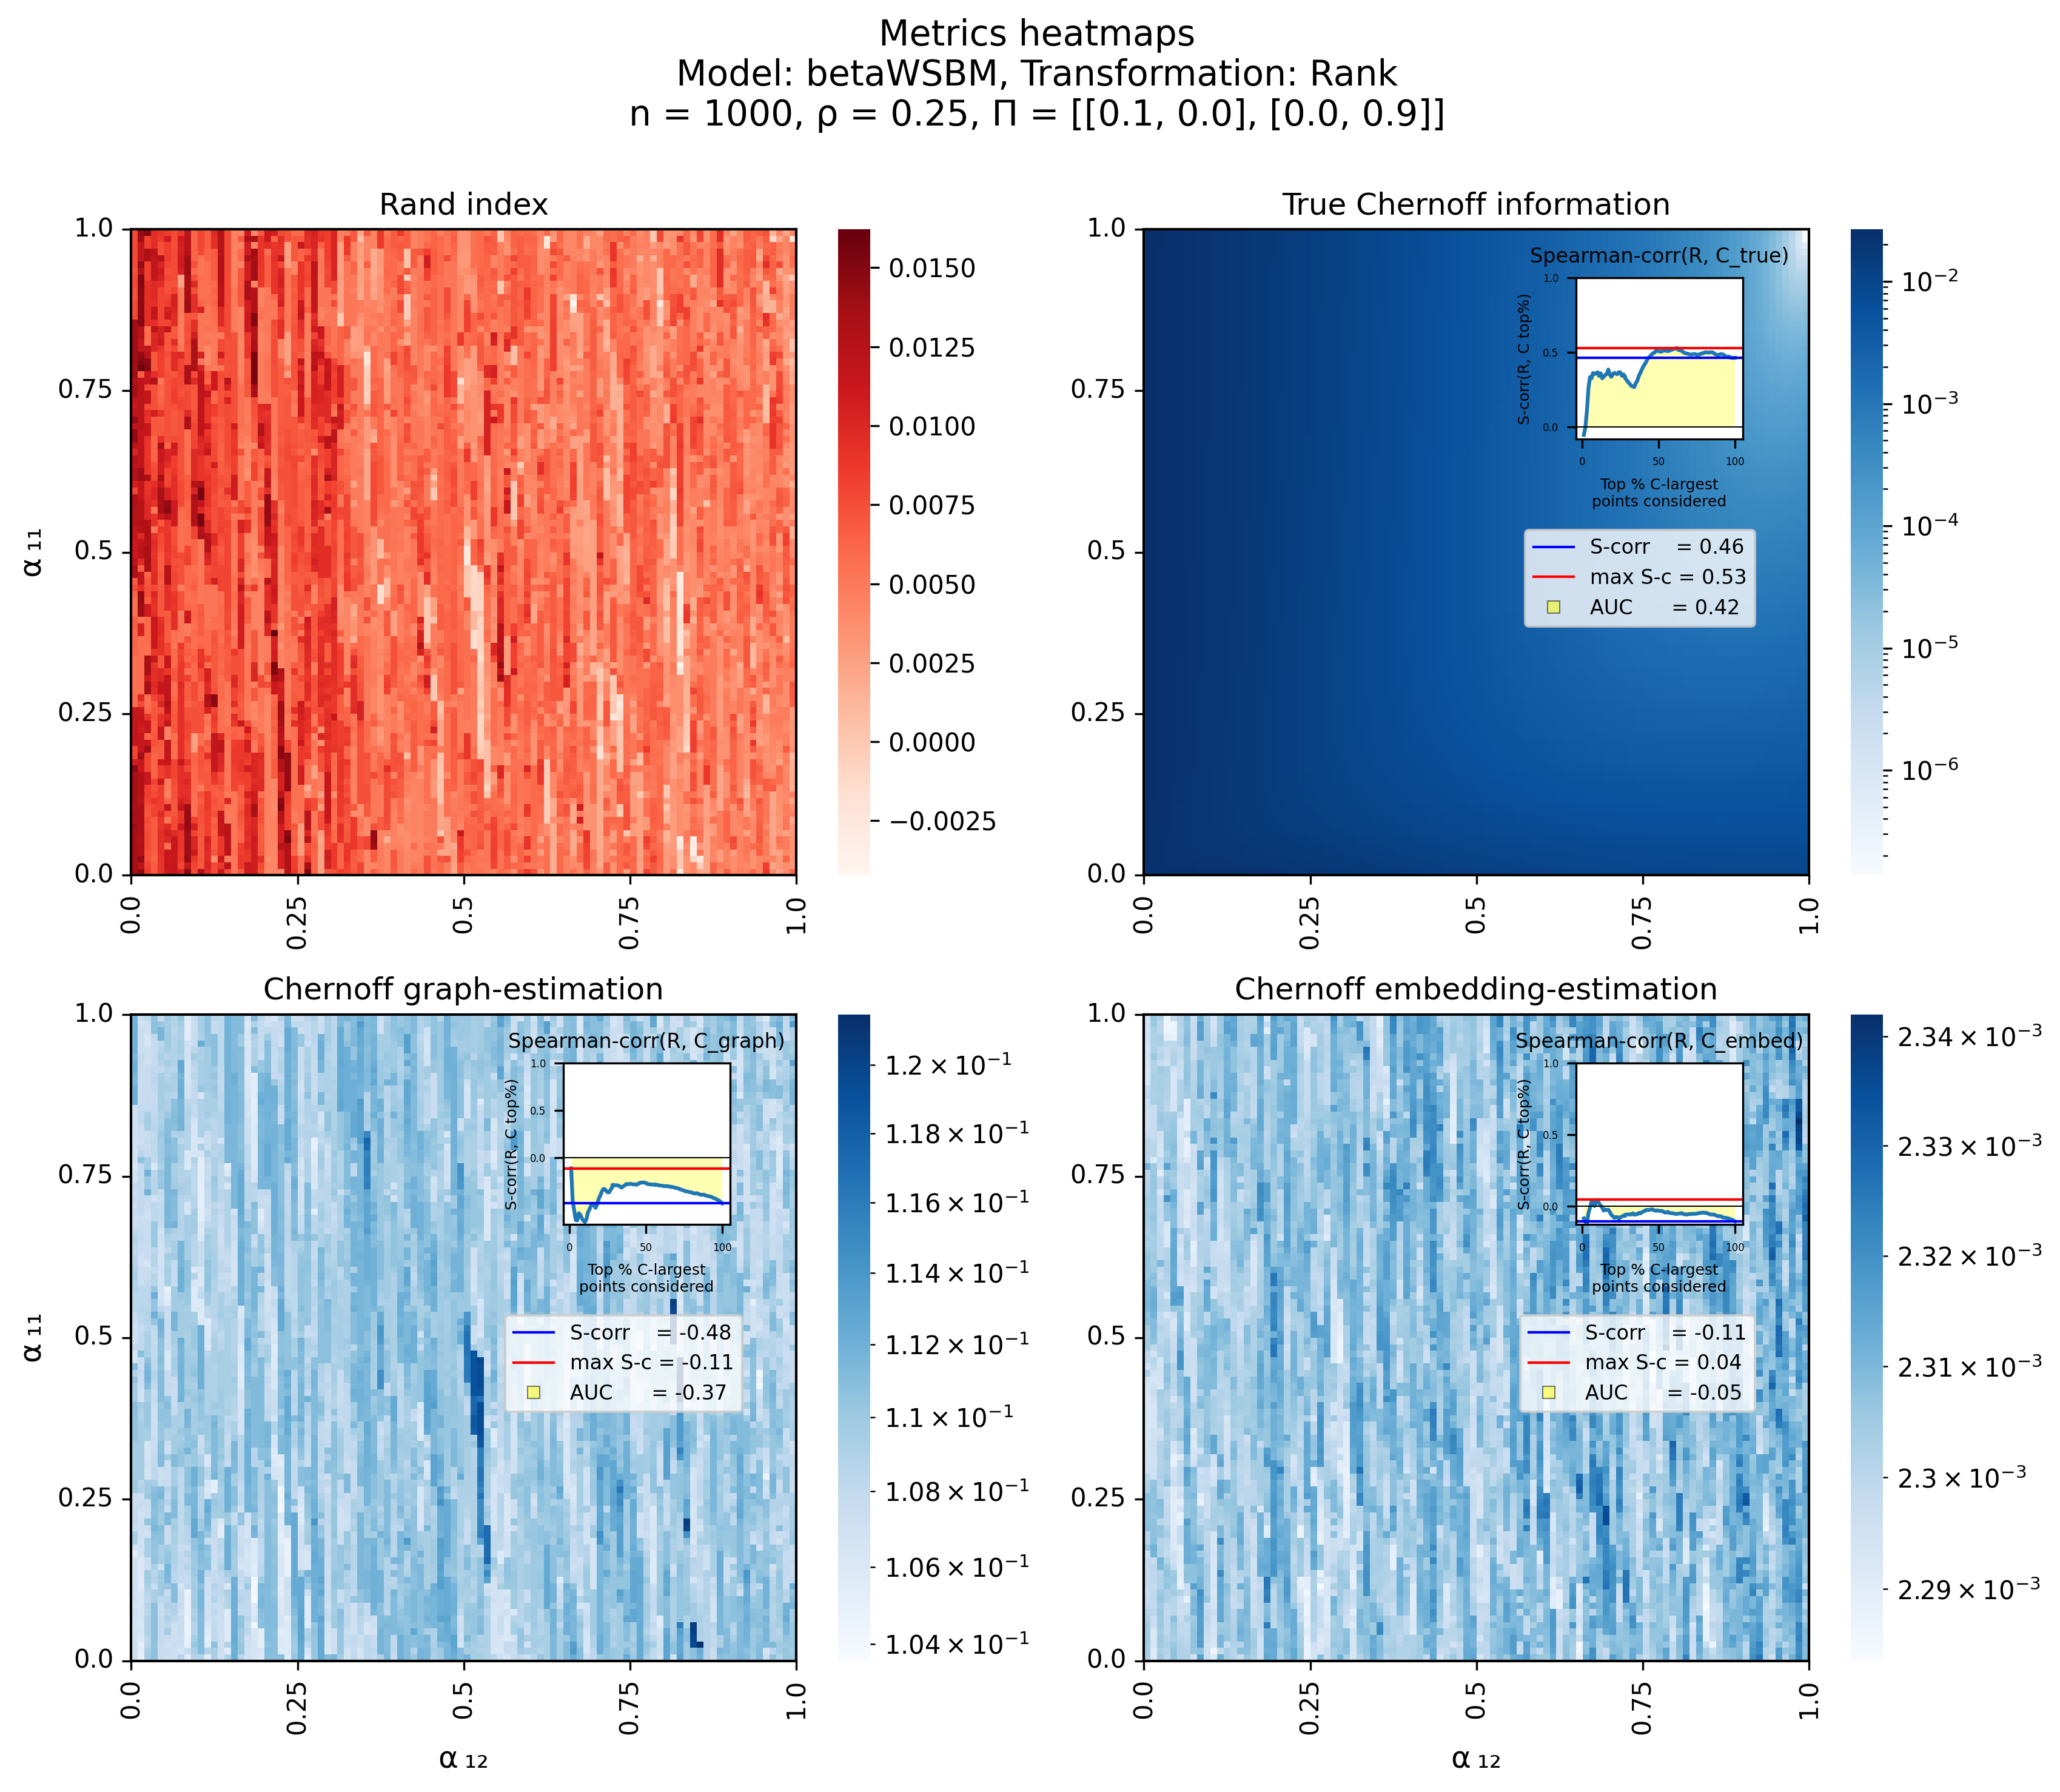

In [7]:
for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	for t in TRANSFORMS:
		m = metrics[(rho, pi, model)][t]
		plot_metrics_heatmap(rho, pi, model, t, m, shared=False, log=True)

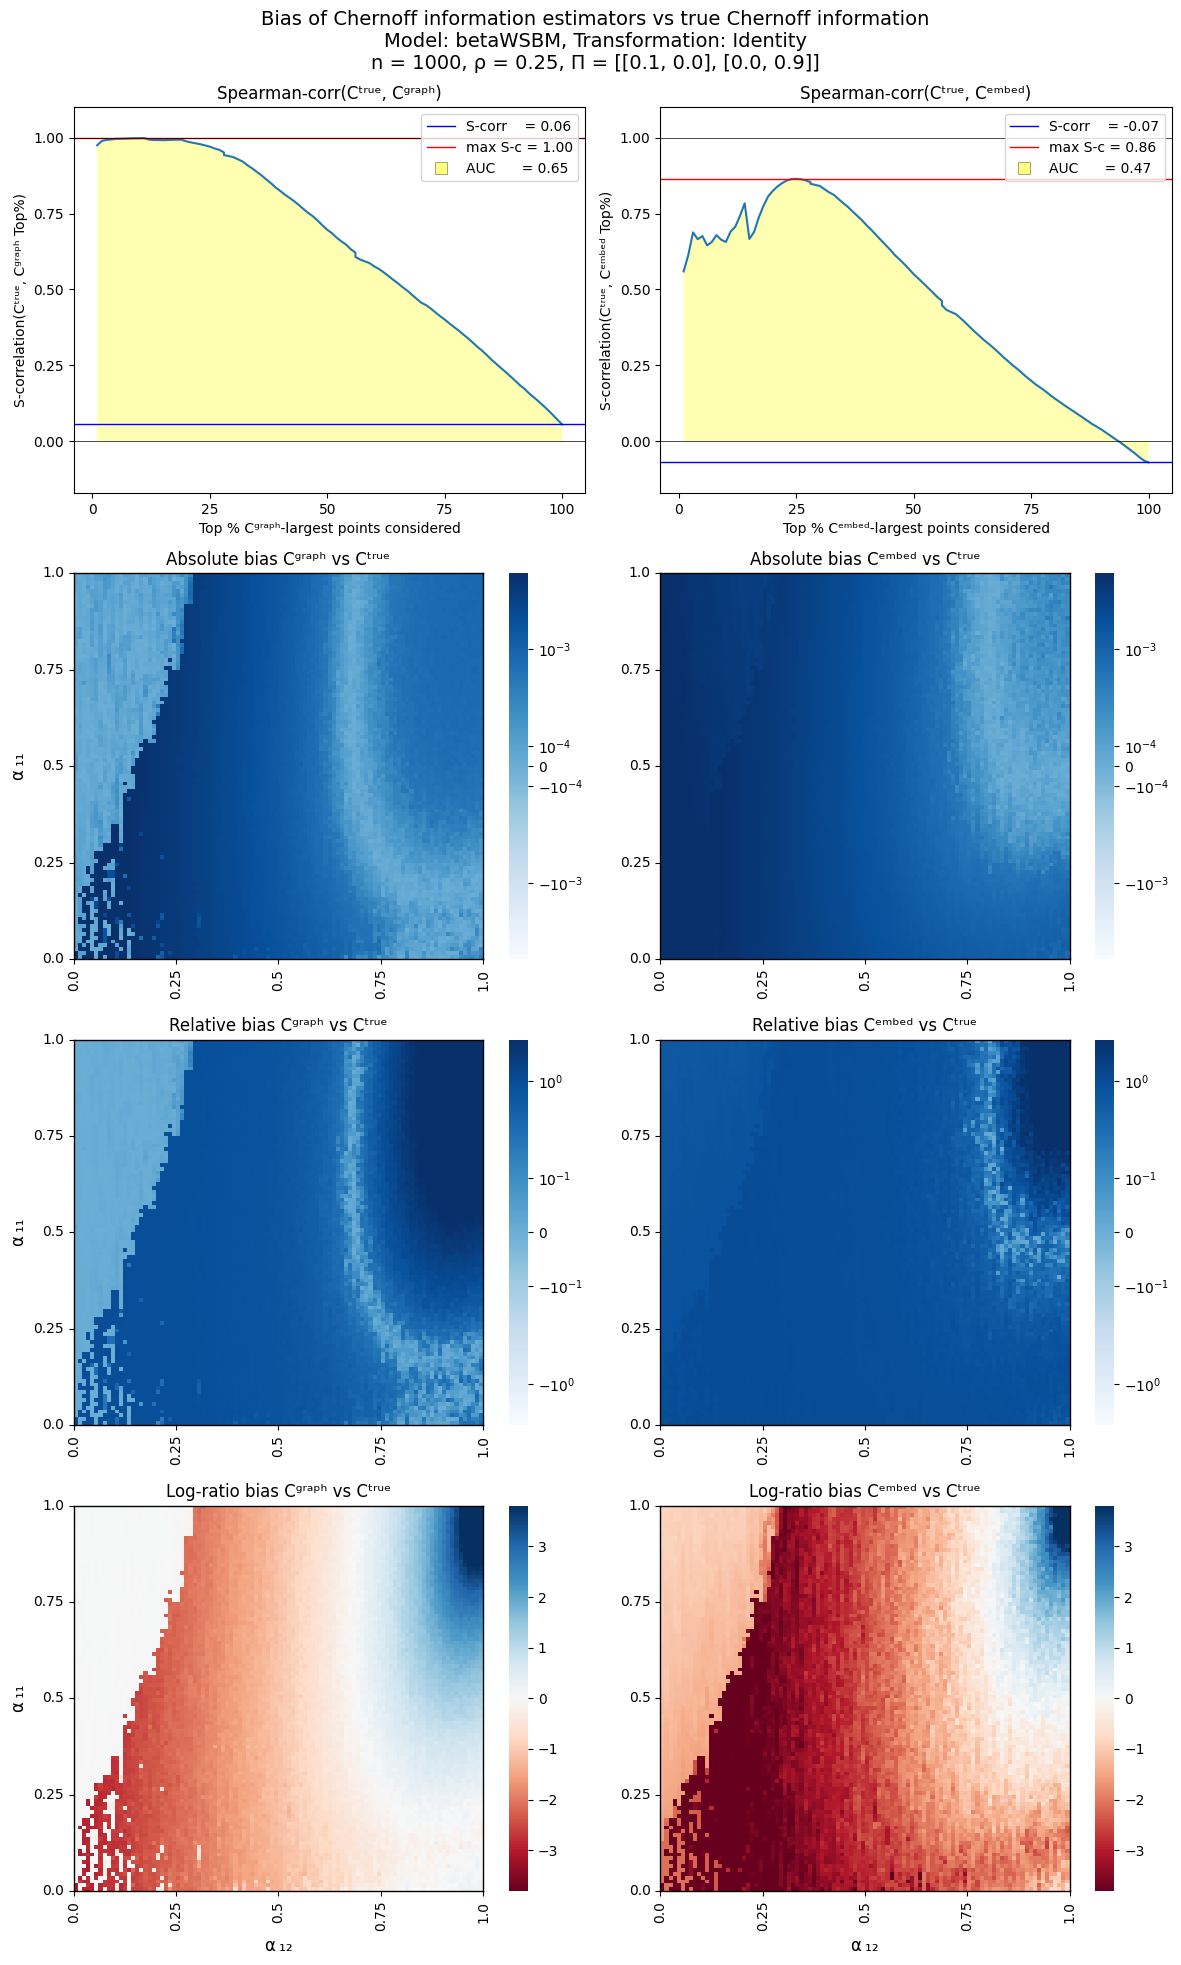

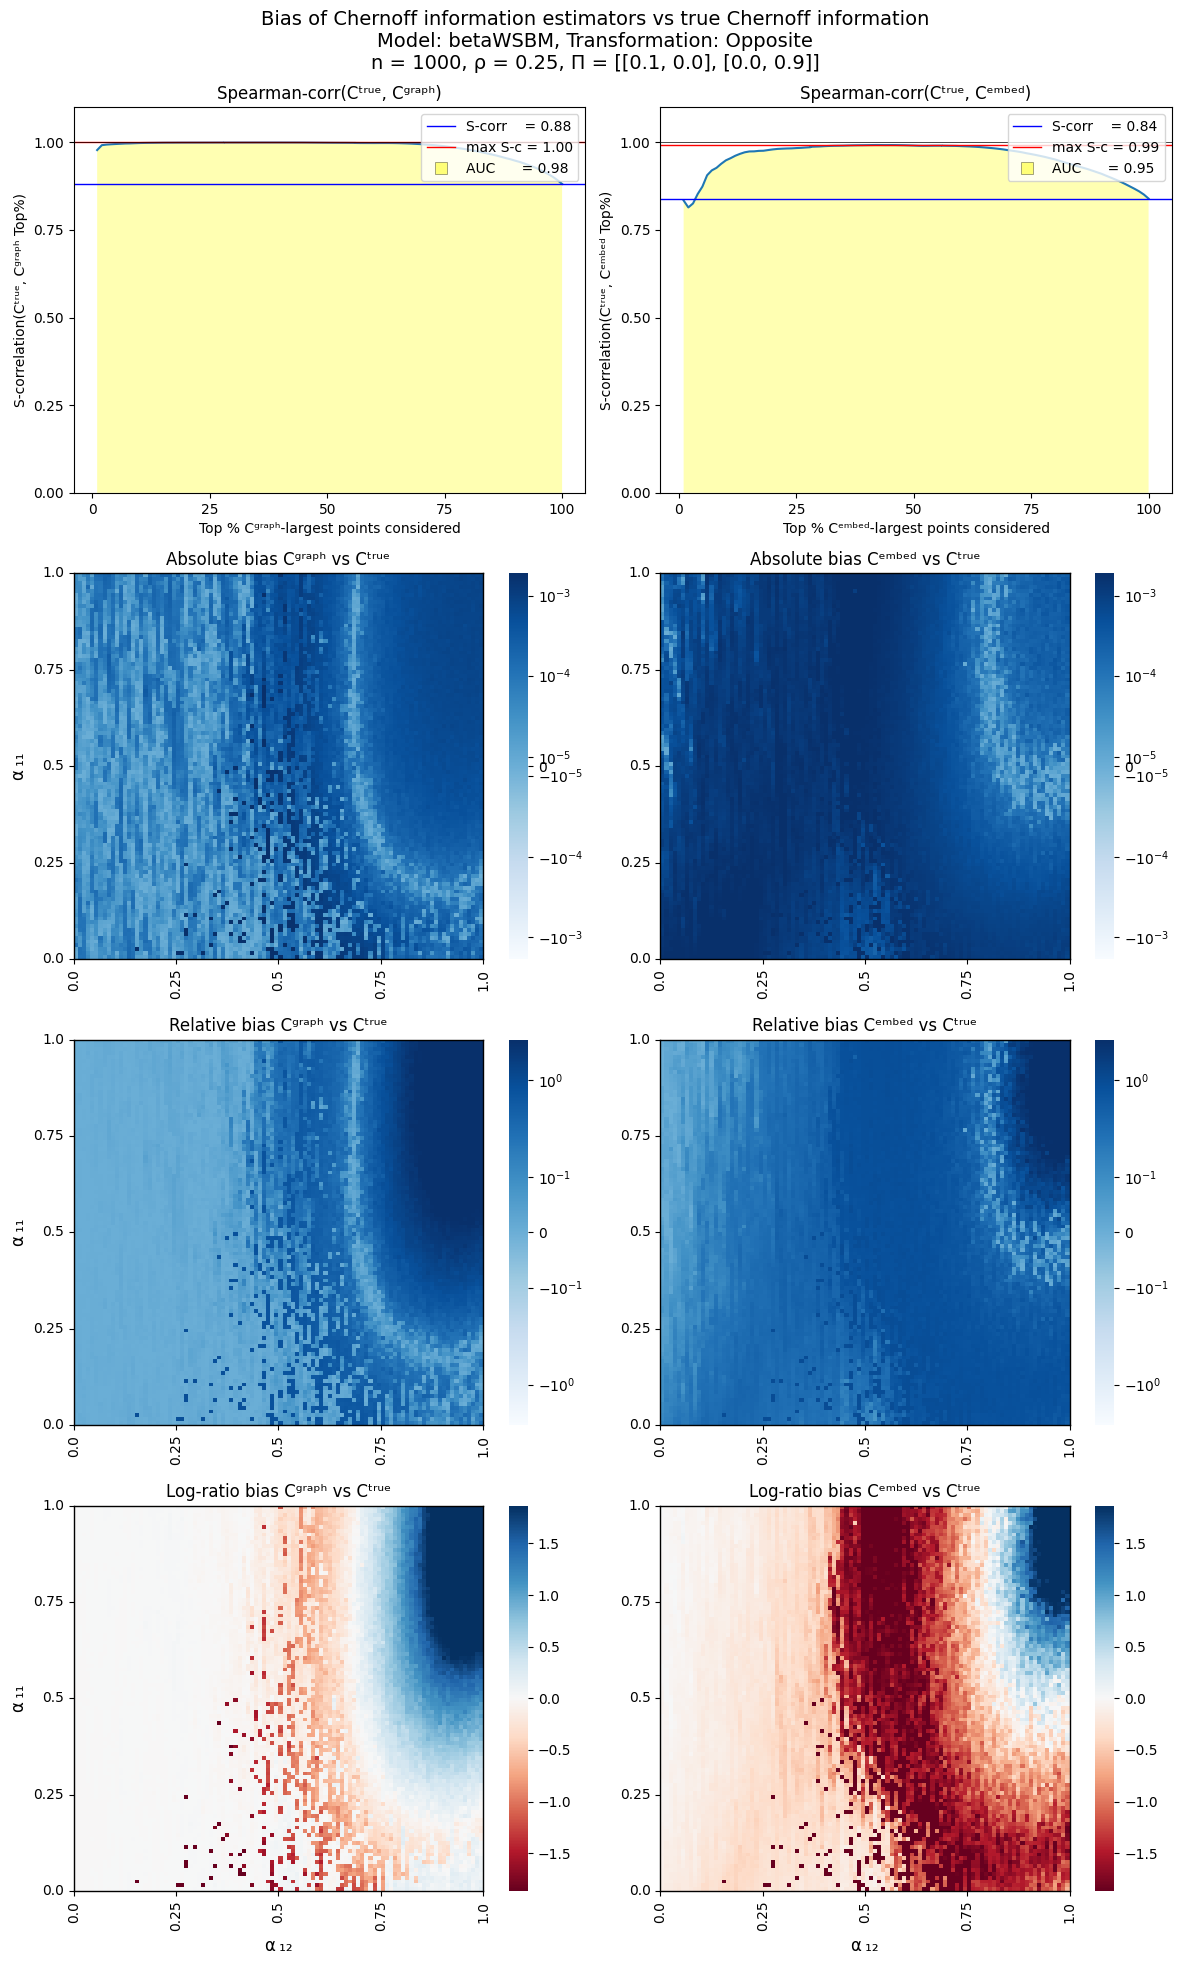

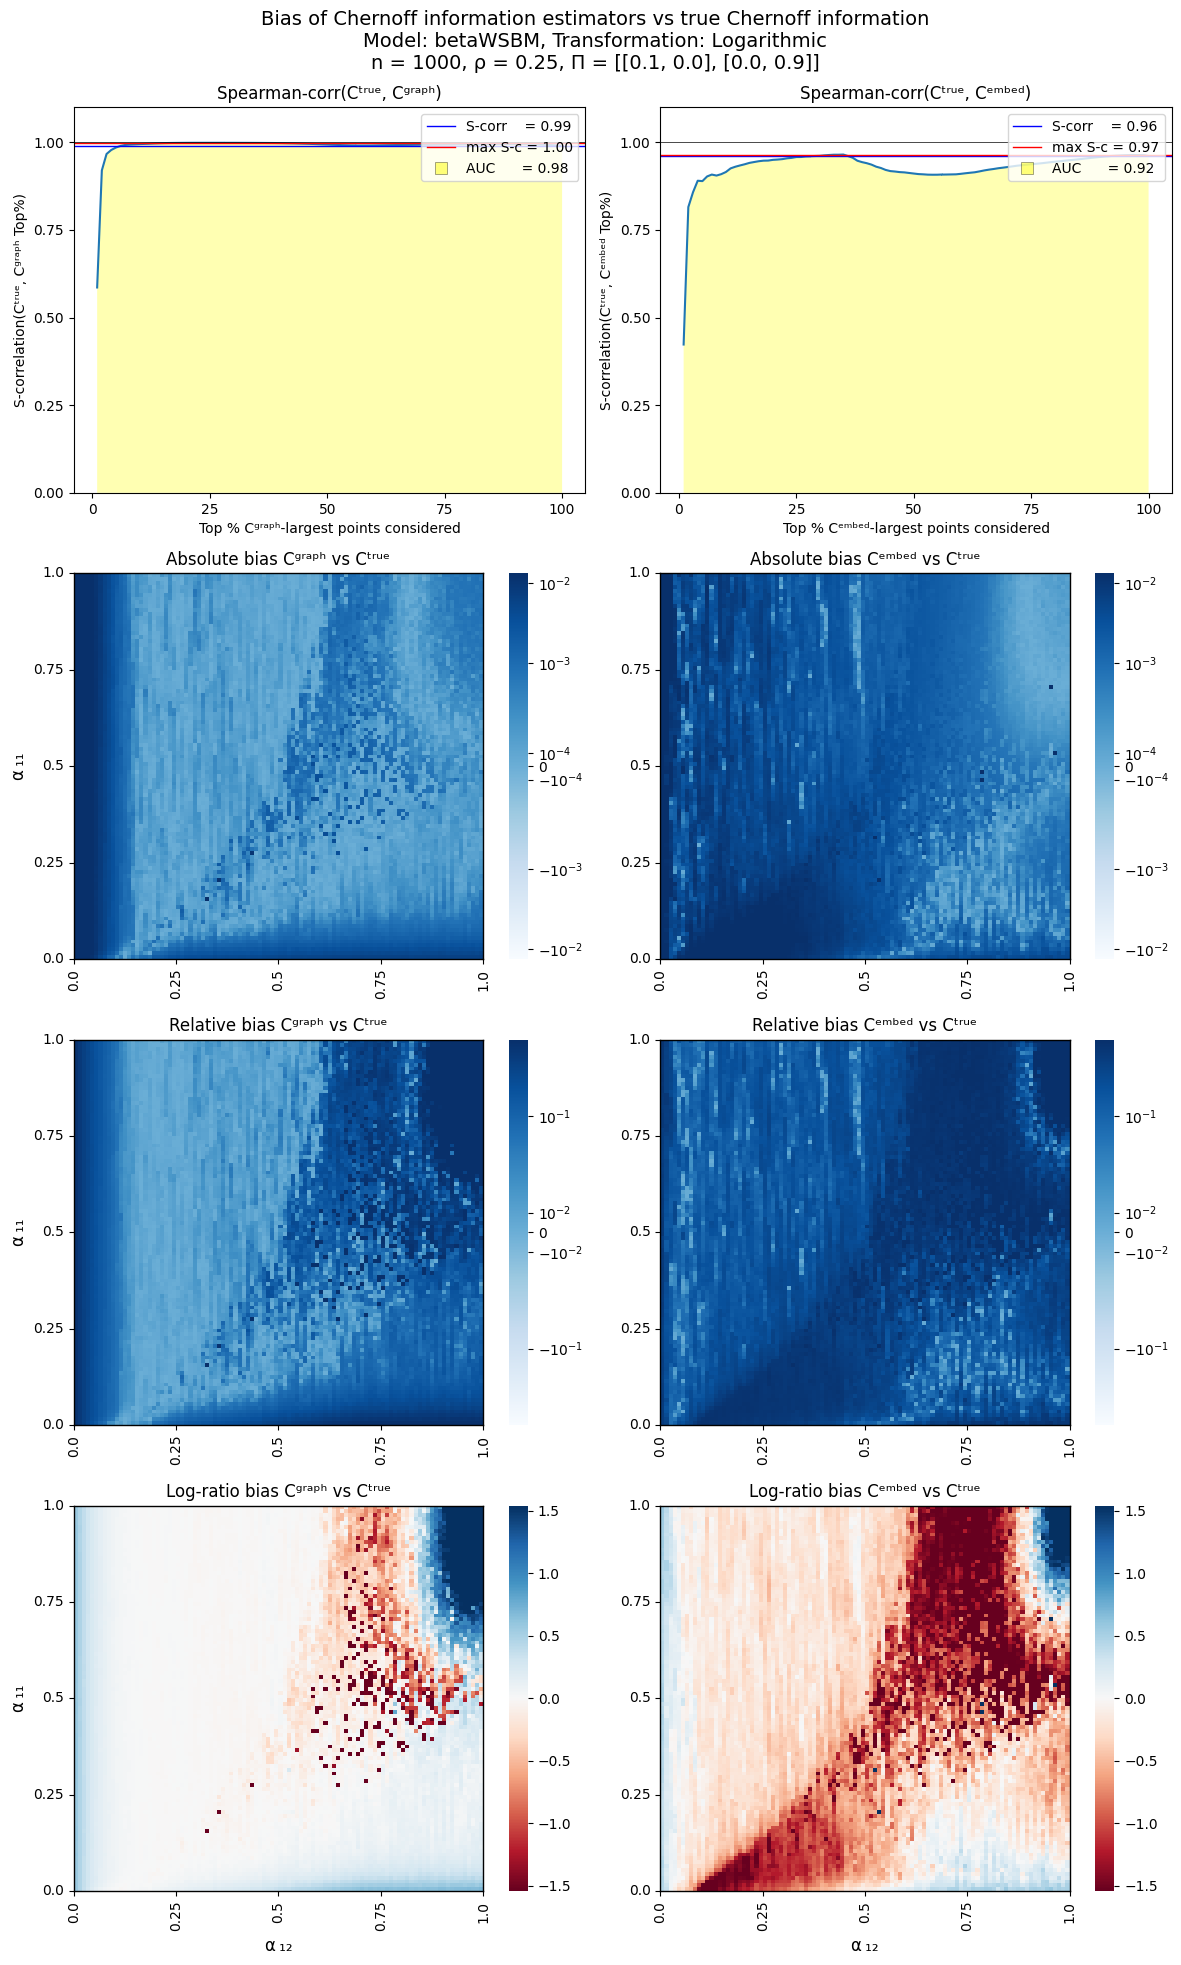

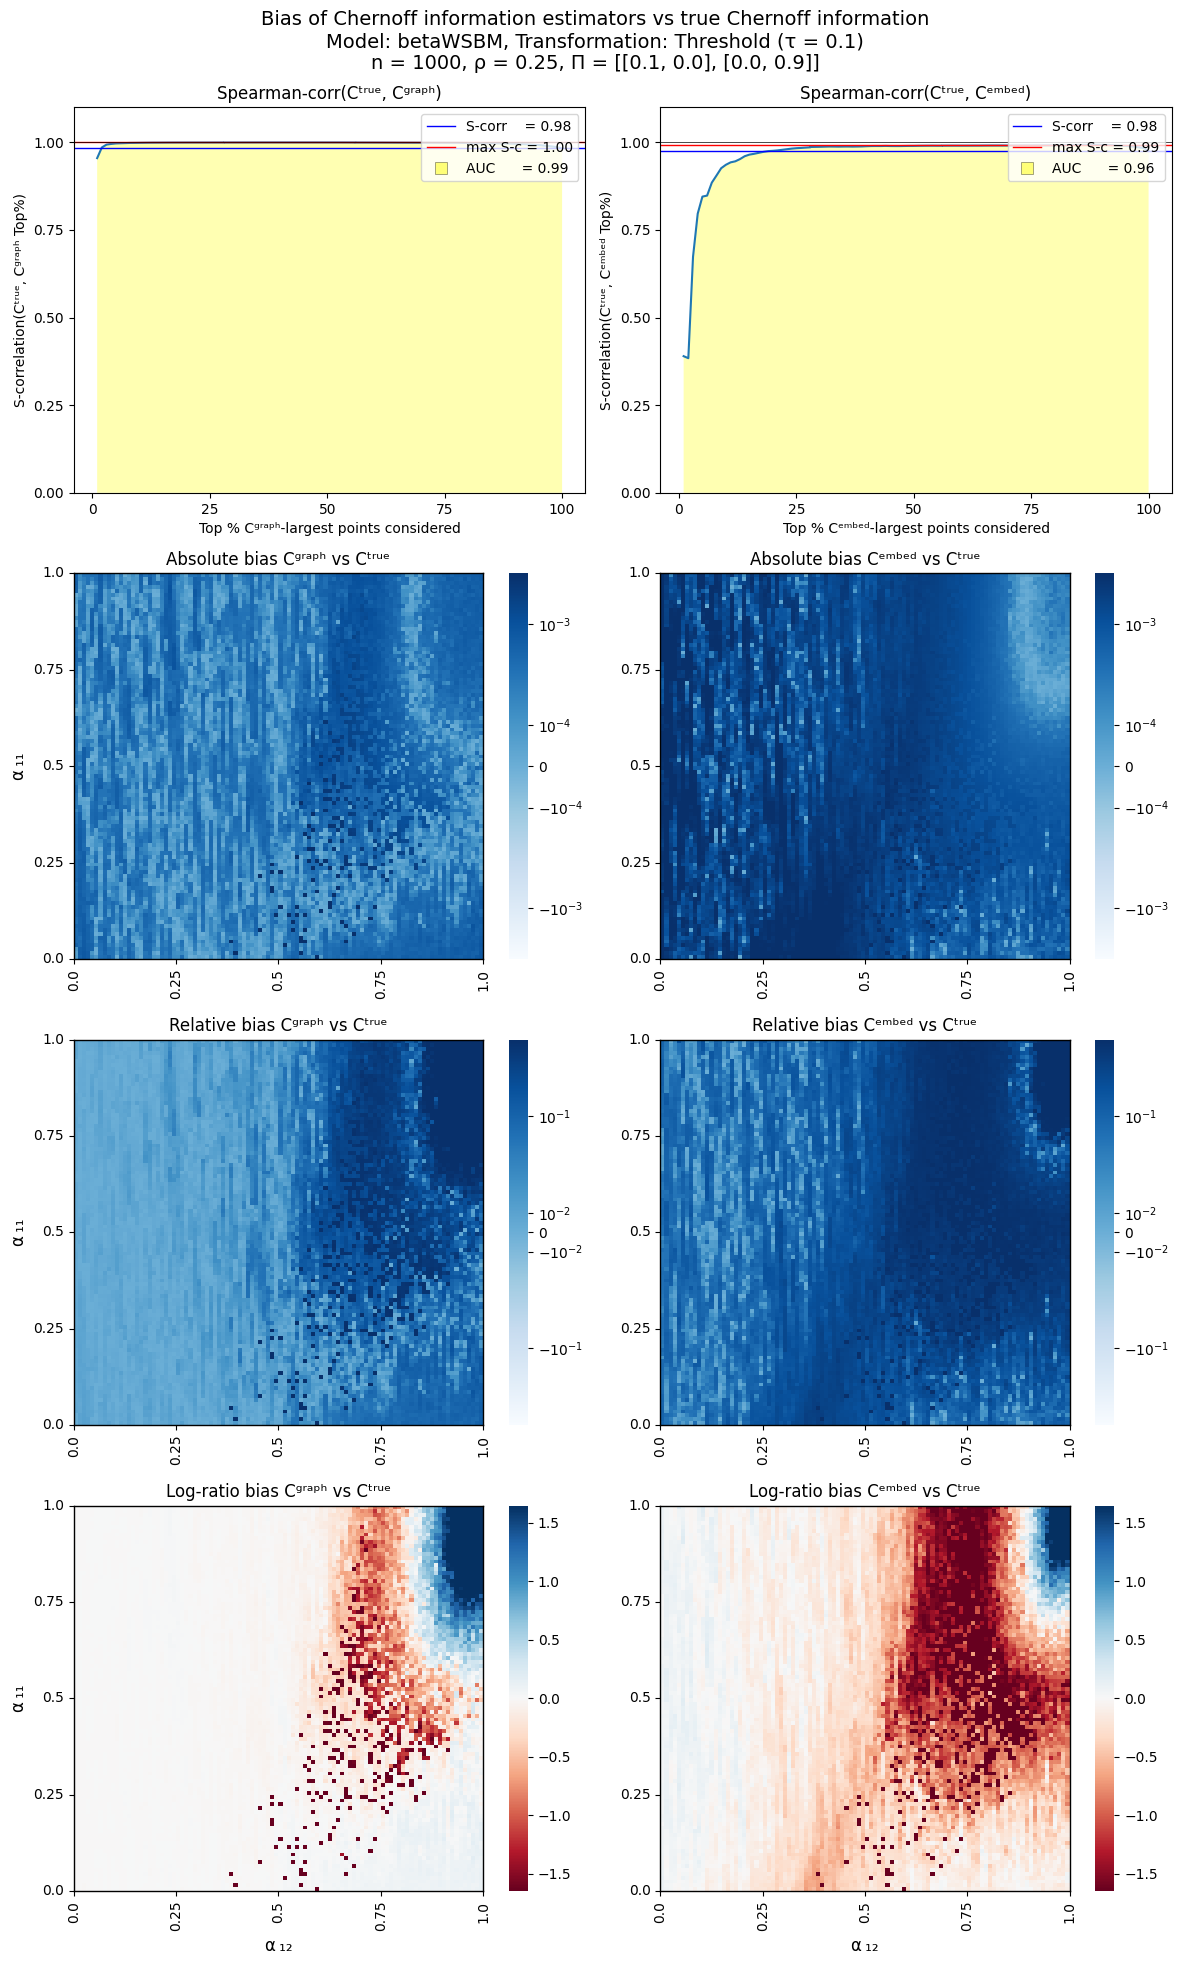

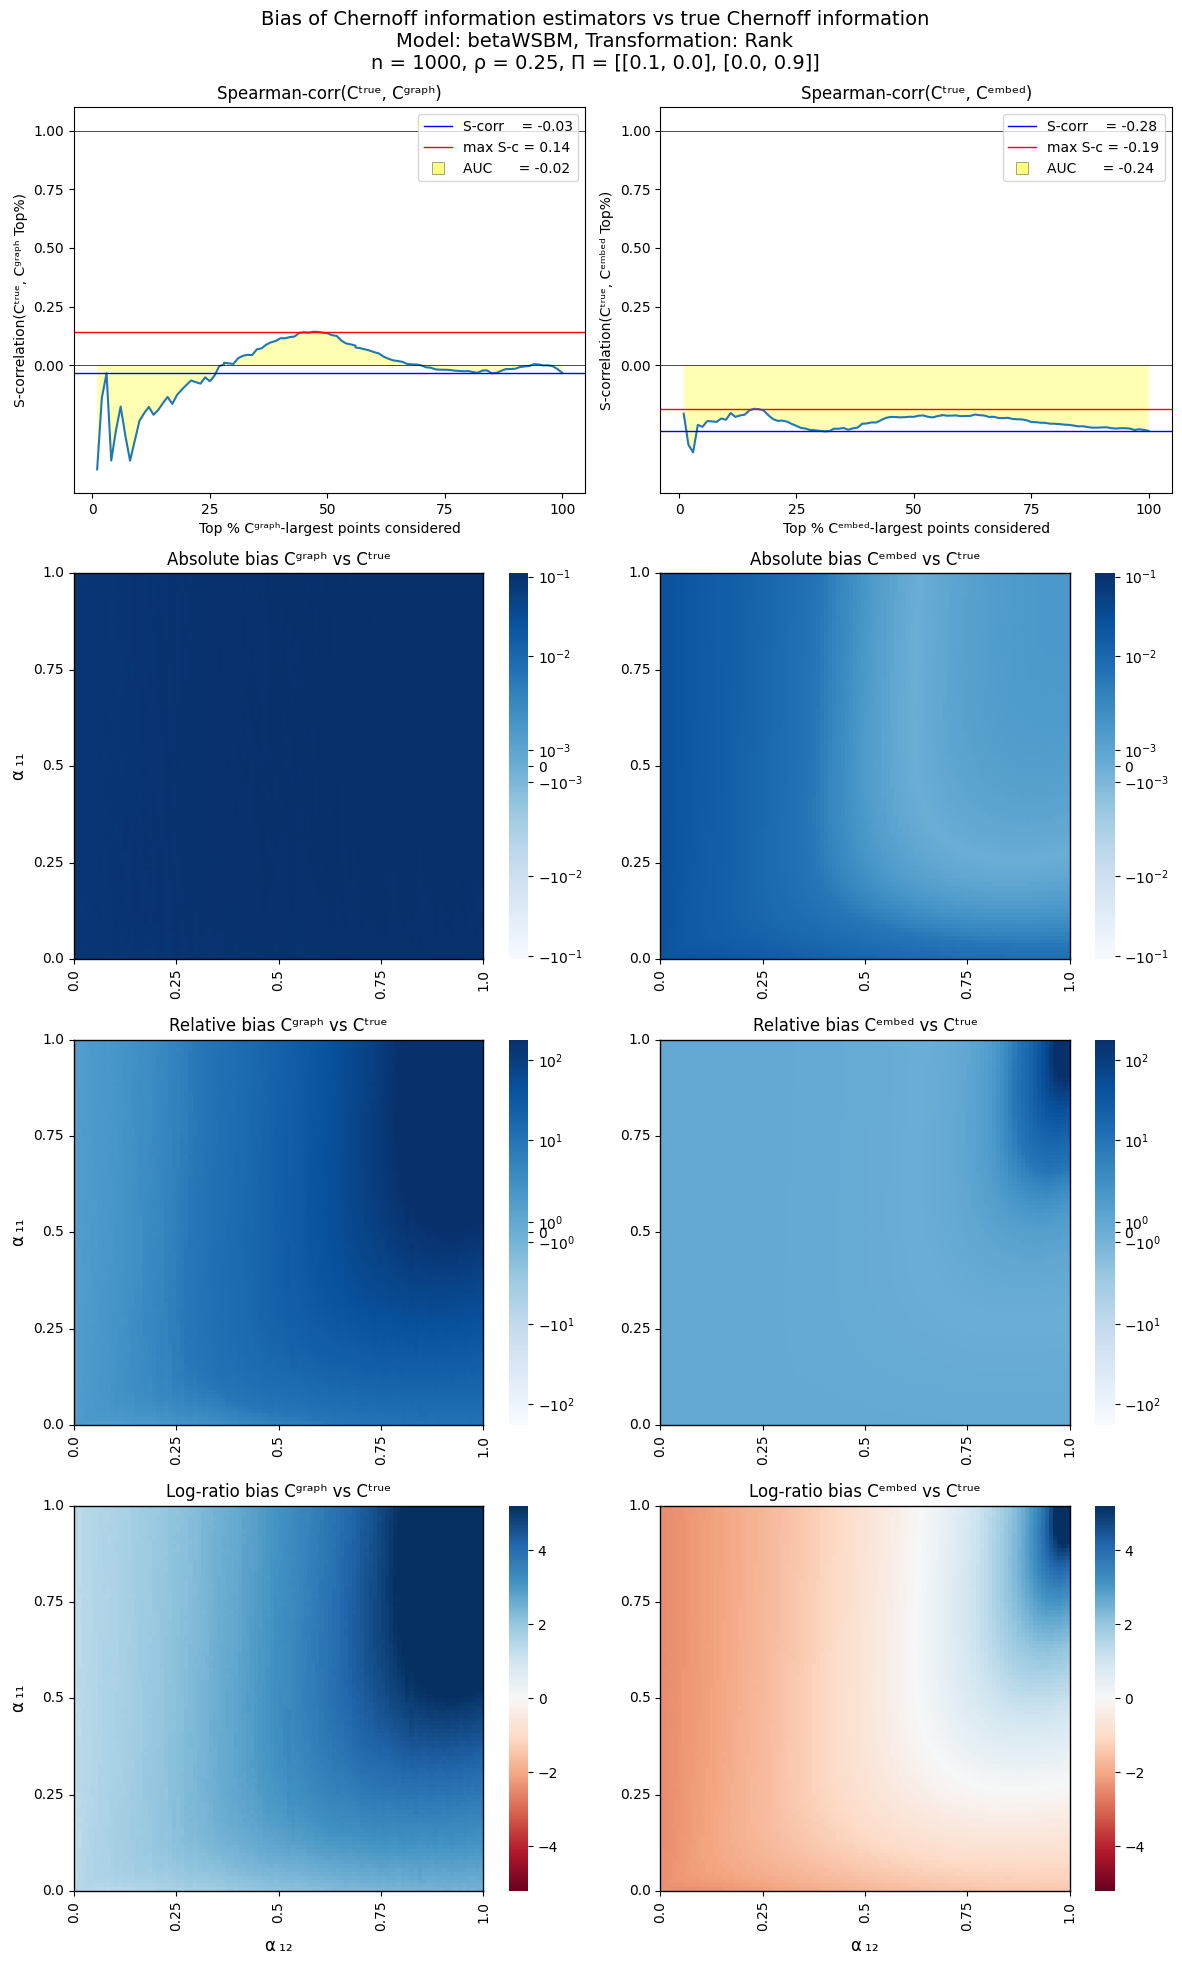

In [8]:
for rho, pi, model in RHOS_PIS_MODELS:
	m = metrics[(rho, pi, model)]
	for t in TRANSFORMS:
		m = metrics[(rho, pi, model)][t]
		plot_bias_heatmap(rho, pi, model, t, m, log = True)